# Norms

## Vector Norms

> **DEFINITION.** 
A _norm_ is a function: 
$$\|\cdot \|:\mathbb{C}^m\to\mathbb{R}_{\geq 0}$$
satisfying:
- $\|\mathbf{x}\|\geq 0$, and $\|\mathbf{x}\|=0$ only if $\|\mathbf{x}\|=0$,
- $\|\mathbf{x}+\mathbf{y}\|\leq \|\mathbf{x}\|+\|\mathbf{y}\|$,
- $\|\alpha\cdot \mathbf{x}\| = |\alpha|\cdot\|\mathbf{x}\|.$

### Examples

- For $1\leq p < \infty$, and a diagonal matrix $W$ define the _$W$-weighted $\ell_p$-norm_ by:
$$\|\mathbf{x}\|_{p,W} = \left(\sum_{i=1}^m |w_ix_i|^p\right)^{1/p}.$$
- Define the _sup-norm_ or _$\infty$-norm_: $$\|\mathbf{x}\|_\infty = \max_{1\leq i \leq m} |x_i|.$$

In [6]:
x = (1,2,3)
vecnorm(x,1), vecnorm(x,2), vecnorm(x,Inf)

(6.0,3.7416573867739413,3.0)

In [7]:
using Gadfly
f(x) = 1-abs(x)
g(x) = sqrt(1-abs(x)^2)
h(x) = (1-abs(x)^6)^(1/6)
i(x) = (1-abs(1/2*x)^3)^(1/3)

i (generic function with 1 method)

The unit semicircles for $\|\cdot\|_1, \|\cdot\|_2, \|\cdot\|_6, \|\cdot \|_{(2,1),3}$:

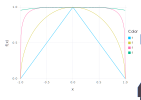

In [8]:
plot([f,g,h,i],-1,1)

In [9]:
p = 3
q = 1/(1-1/p)
x = (1,2,1)
y = (1,-1,4)
abs(vecdot(x,y)), vecnorm(x,p)*vecnorm(y,q)

(3,10.0)

> **DEFINITION.** A vector space $V$ equipped with a norm $\|\cdot \|$ is called a _normed vector space_.

- $\left(\mathbb{C}, \|\cdot \|_2\right)$ is a normed vector space.
- $\left(C^\infty([-\pi,\pi]), \int_{-\pi}^\pi (\cdot, \overline{\cdot}) dx\right)$ is a normed vector space.
- $\left(M_n(\mathbb{C}), \|\cdot \|_F\right)$ is a normed vector space.

## Matrix norms

### Induced norms

We can view an $m\times n$ matrix as being a _vector_ in $\mathbb{C}^{m\times n}$.   We can then _induce norms_ on matrices.

Given:

$$
M : \mathbb{R}^n \to \mathbb{R}^m
$$

With vector norms $\|\cdot \|_{(n)}$ and $\|\cdot \|_{(m)}$ on the domain and range of $M$:

$$
\|M\|_{(m,n)} :=\min_{\|M\mathbf{x}\|_{(m)}\leq C\|\mathbf{x}\|_{(n)}} \{C\in\mathbb{R}\}.
$$

Intuitively, $\|M\|_{(m,n)}$ is the maximal scaling factor of $M$.

Equivalently, for an $m\times n$ matrix $M$, we can define:

$$
\|M\|_{(m,n)} =\sup_{\mathbf{x}\in\mathbb{C}^n\setminus \mathbf{0}} \frac{\|M\mathbf{x}\|_{(m)}}{\|\mathbf{x}\|_{(n)}} = \sup_{\mathbf{x}\in\mathbb{C}^n, \|\mathbf{x}\|_{(n)}=1} \|M\mathbf{x} \|_{(m)}.
$$

In [10]:
M = [1 2; 0 3]
norm(M,1), norm(M,2), norm(M, Inf)

(5.0,3.6502815398728847,3.0)

The matrix norm is the largest possible scaling of a unit vector.

![matrixnorm](http://i.stack.imgur.com/9DdDb.png)

### $p$-norms of Diagonal matrices

For a diagonal matrix:$$D=\begin{bmatrix}d_1 & & & \\ & d_2 & & \\ & & \ddots & \\ & & & d_m\end{bmatrix}$$ 

The image of the $2$-norm unit ball under $D$ is an $m$-dimensional hyperellipse.  In fact, this is true of any $p$-norm of a diagonal matrix: 

$$\|D\|_p = \max_{1\leq i \leq m} \left\{|d_i|\right\}.$$

In [11]:
D = diagm([1,2,3,4])
norm(D, 2), norm(D,1), norm(D, Inf)

(4.0,4.0,4.0)

### 1-norm of a Matrix

For an $m\times n$ matrix $M$, the $1$-norm $\|M\|_1$ is equal to the "maximum column sum".

Write: $$M=\begin{bmatrix} \mathbf{c}_1 | \cdots | \mathbf{c}_n\end{bmatrix},\quad \mathbf{c}_i \in \mathbb{C}^m,$$

$$\|M\mathbf{x} \|_1 = \left\|\sum_{j=1}^n x_j \mathbf{c}_j\right\|_1 \leq \sum_{j=1}^n |x_j|\cdot \|\mathbf{c}_j\|_1 \leq \max_{1\leq j \leq n} \|\mathbf{c}_j\|_1.$$

Hence $\|M\|_1\leq \max_{1\leq j\leq n} \|\mathbf{c}_j\|_1$.  We can choose $x=e_j$, where $j$ maximizes $\|\mathbf{c}_j\|_1$.  Therefore:
$$\|M\|_1 = \max_{1\leq j\leq n} \|\mathbf{c}_j\|_1.$$

In [12]:
M = [1 2 3; 4 5 6]
norm(M,1), vecnorm((1,4),1), vecnorm((2,5),1), vecnorm((3,6),1)

(9.0,5.0,7.0,9.0)

### The $\infty$-norm of a Matrix

By the same argument one can show that the $\infty$-norm of an $m\times n$ matrix is equal to the "maximum row sum":
$$\|M\|_\infty =\max_{1\leq i \leq m} \|\mathbf{c}_i^*\|_1.$$

In [13]:
M = [1 2 3; 4 5 6]
norm(M,Inf), vecnorm((1,2,3),1), vecnorm((4,5,6),1)

(15.0,6.0,15.0)

## Hölder's Inequality

> **THEOREM. [Hölder Inequality]** Let $1\leq p,q\leq \infty$ satisfy $\frac{1}{p}+\frac{1}{q} =1$, then: $$|\mathbf{x}^* \mathbf{y}|\leq \|\mathbf{x}\|_p \|\mathbf{y}\|_q.$$

Setting $p=q=2$ we get:

> ** COROLLARY. [Cauchy-Schwarz Inequality] ** $$|\mathbf{x}^*\mathbf{y} | \leq \|\mathbf{x}\|_2\|\mathbf{y}\|_2.$$

> ** THEOREM. [Young's Inequality] ** For $a,b\in\mathbb{R}_{\geq 0}$, $p,q\in\mathbb{R}_+$, and $\frac{1}{p}+\frac{1}{q} = 1$:
$$
ab \leq \frac{a^p}{p} + \frac{b^q}{q}.
$$

In [14]:
l(x) = log(x)
m(x) = (x/4)*log(4)

m (generic function with 1 method)

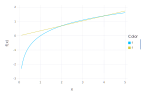

In [15]:
plot([l,m],0.1,5)

** Proof of Young's Inequality. **

The claim is certainly true if $a = 0$ or $b = 0$. Therefore, assume $a > 0$ and $b > 0$ in the following. Put $t = 1/p$, and $(1 − t) = 1/q$. Then since the logarithm function is strictly concave,

\begin{align}
\log(ta^{p}+(1-t)b^{q})&\geq t\log(a^{p})+(1-t)\log(b^{q})\\ &=\log(a)+\log(b)\\ &=\log(ab)
\end{align}

with the equality holding if and only if $a^p = b^q$. Young's inequality follows by exponentiating.

** Proof of Hölder's Inequality. **

Exercise.

### The $2$-norm of a row vector

Consider $M=\mathbf{c}^*$.

$$
\|M\mathbf{x} \|_2  = |\mathbf{c}^*\mathbf{x}|\leq \|\mathbf{c}\|_2\|\mathbf{x}\|_2.
$$

N.B. $\|M\mathbf{c}\|_2 = \|\mathbf{c}\|_2^2$.  Therefore:

$$
\|M\|_2 = \sup_{\mathbf{x}\ne \mathbf{0}} \left\{\|M\mathbf{x}\|_2/\|\mathbf{x}\|_2\right\} = \|\mathbf{c}\|_2.
$$


### The 2-norm of an outer product

For $M= \mathbf{u}\mathbf{v}^*$, we have:

$$
\|M\mathbf{x}\|_2 = \|\mathbf{u}\mathbf{v}^* \mathbf{x}\|_2 = \|\mathbf{u}\|_2 |\mathbf{v}^*\mathbf{x}|\leq \|\mathbf{u}\|_2\|\mathbf{v}\|_2\|\mathbf{x}\|_2.
$$

This implies: $\|M\|_2\leq \|\mathbf{u}\|_2\|\mathbf{v}\|_2$.   Further, taking $\mathbf{v}=\mathbf{x}$ shows that $\|M\|_2= \|\mathbf{u}\|_2\|\mathbf{v}\|_2$.

### Bounding $\|AB\|$ in an induced norm

Let $\|\cdot \|_{(\ell)}$, $\|\cdot \|_{(m)}$, $\|\cdot \|_{(n)}$, be vector norms on $\mathbb{C}^\ell$, $\mathbb{C}^m$, $\mathbb{C}^n$, respectively.

$$
\|AB\mathbf{x}\|_{(\ell)} \leq \|A\|_{(\ell,m)}\cdot \|B\mathbf{x}\|_{(m)}  \leq \|A\|_{(\ell,m)} \cdot \|B\|_{(m,n)} \cdot \|\mathbf{x}\|_{(n)}.
$$

## General Matrix Norms

> **DEFINITION.** A map: $$\|\cdot\|: \mathbb{C}^{m\times n} \to \mathbb{R}_{\geq 0}$$ is a _matrix norm_ if:
- $\|M\|\geq 0$, and $\|M\|=0$ only if $M=0$,
- $\|M+N\|\leq \|M\| +\|N\|$,
- $\|\alpha\cdot M\| = |\alpha|\cdot \|M\|$.

#### Example

The _Hilbert-Schmidt_ or _Frobenius norm_ is defined for $M\in\mathbb{C}^{m\times n}$ by:
$$\|M\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}.$$

*Nota Bene*: This is identical to the Euclidean $2$-norm when viewed as an $mn$-dimensional vector.

$$\|M\|_F = \left\|(\mathbf{c}_1 |\cdots |\mathbf{c}_n)\right\| = \sqrt{\sum_{j=1}^n \|\mathbf{c}_j\|_2^2} = \sqrt{\mathrm{tr}(A^*A)} = \sqrt{\mathrm{tr}(AA^*)}.$$

### Bounding the product with the Frobenius norm

Let $C=AB=(c_{ik})$, and let $A=\left(\mathbf{a}_1|\cdots | \mathbf{a}_n\right)$, and $B=\left(\mathbf{b}_1|\cdots | \mathbf{b}_m\right)$, then:

\begin{align}
\|AB\|_F^2 & = \sum_{i=1}^n \sum_{j=1}^m |c_{ij}|^2\\ &= \sum_{i=1}^n \sum_{j=1}^m |\mathbf{a}_i^*\mathbf{b}_j|^2\\ &\leq \sum_{i=1}^n \sum_{j=1}^m \left(\|\mathbf{a}_i\|_2\|\mathbf{b}_j\|_2\right)^2\\ &= \sum_{i=1}^n \left(\|\mathbf{a}_i\|_2\right)^2 \sum_{j=1}^m \left(\|\mathbf{b}_j\|_2\right)^2 = \|A\|_F^2\cdot \|B\|_F^2.
\end{align}

In [16]:
M = [1 2 3; 4 5 6]
vecnorm(M), sqrt(trace(M*M')), sqrt(trace(M'*M)), norm(M,2)

(9.539392014169456,9.539392014169456,9.539392014169456,9.508032000695724)

## Invariance under Unitary Matrices

> **THEOREM.** For $M\in\mathbb{C}^{m\times n}$ and $Q\in\mathbb{C}^{m\times m}$ unitary, we have: $$\|Q M\|_2 = \|A\|_2,\quad \|QM\|_F= \|M\|_F.$$

**Proof.** Follows from $\|Q\mathbf{x}\|_2=\|\mathbf{x}\|_2$ for every $\mathbf{x}$, and interpreting a matrix as a 'vector of column vectors'.

In [17]:
M = [1 2 3; 4 5 6]
Q = [0 -1; 1 0]
#inv(Q)

2×2 Array{Int64,2}:
 0  -1
 1   0

In [18]:
norm(Q*M,2), norm(M,2), vecnorm(Q*M), vecnorm(M)

(9.508032000695724,9.508032000695724,9.539392014169456,9.539392014169456)

In [19]:
S = svdvals([1 2 3; 4 5 6])
S[1], sqrt(S[1]^2+S[2]^2)

(9.508032000695724,9.539392014169456)

## Equivalence of matrix norms

> ** Definition. **  Two norms $\|\cdot \|_1$ and $\|\cdot \|_2$ are said to be _equivalent_ if there are positive real numbers $c,C\in\mathbb{R}_+$ such that:
$$c\cdot \|\cdot\|_2\leq \|\cdot \|_1\leq C\cdot \|\cdot\|_2.$$


> ** THEOREM. **  All matrix norms are equivalent.

** Proof. ** Exercise.